## 

# Snap Joint Calculation Insight2.0

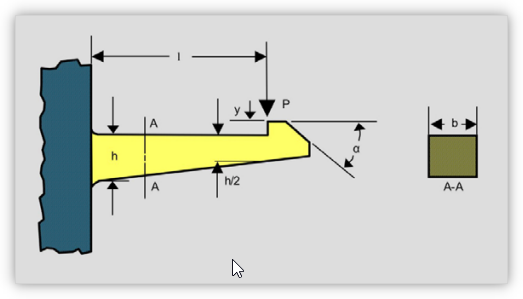

## Defining Values:
units in mm, MPa and N

In [32]:

print('--------------GEOMETRY VALUES--------------')
snapLength=8
print('Snap Length l       = ', snapLength,'mm')
snapWidth=6
print('Snap Width b        = ', snapWidth,'mm')
bottomThickness=1.964
print('bottom Thickness h  = ', bottomThickness,'mm')
topThickness=0.98
print('top Thickness h/2  = ', topThickness,'mm')
snapAngle=15
print('snap Angle  ALPHA  = ', snapAngle,'deg')
deflection=1
print('deflection y       = ', deflection,'mm')
print()
print('--------------MATERIAL VALUES--------------')
materialGrade='Polycarbonate Makrolon (unspecified grade)'
print('Material Grade    = ', materialGrade)
flexModulus=2750
print('flexural Modulus  = ', flexModulus, 'MPa, (https://omnexus.specialchem.com/polymer-property/stiffness#PA-PC)')
yieldStrength=65
print('Strength at Yield = ', yieldStrength, 'MPa, (https://omnexus.specialchem.com/polymer-property/stiffness#PA-PC)')
strainLimit=4
print('Permissible short term strain limits at 23˚C = ', strainLimit, ' %')
friction=0.5
print('Friction coefficient, µ = ', friction)
print()
print('--------------LOAD VALUES----------------')
snapForce=0.5
print('snap Force    = ', snapForce, 'N')
print()
print('--------------CALCULUS VALUES------------')
safety=2
print('safety factor S = ', safety)

--------------GEOMETRY VALUES--------------
Snap Length l       =  8 mm
Snap Width b        =  6 mm
bottom Thickness h  =  1.964 mm
top Thickness h/2  =  0.98 mm
snap Angle  ALPHA  =  15 deg
deflection y       =  1 mm

--------------MATERIAL VALUES--------------
Material Grade    =  Polycarbonate Makrolon (unspecified grade)
flexural Modulus  =  2750 MPa, (https://omnexus.specialchem.com/polymer-property/stiffness#PA-PC)
Strength at Yield =  65 MPa, (https://omnexus.specialchem.com/polymer-property/stiffness#PA-PC)
Permissible short term strain limits at 23˚C =  4  %
Friction coefficient, µ =  0.5

--------------LOAD VALUES----------------
snap Force    =  0.5 N

--------------CALCULUS VALUES------------
safety factor S =  2


---
## Formulas:

|              |                   Formula                                       |
|--------------|-----------------------------------------------------------------|
|   Stiffness  | $k=\frac{P}{y}=\frac{Eb}{6.528}(\frac{t}{L})^3$                 |
|              |                                                                 |
|   Strain     | $E=1.17\frac{t}{L^2}Y$                                          |
|              |                                                                 |
|   Tension    | $sigma_{max}=\frac{M_b}{I}e_z$                                  |
|              |                                                                 |


Where:
* E = Flexural Modulus
* P = Force
* Y = Deflection
* b = Width of Beam
* Mb=Torque at x
* I = Flächenmoment at x
* Ez= Randabstand
---

## Calculation
### allowed strain

In [33]:
stiff=round((flexModulus*(snapWidth/6.528))*(bottomThickness/snapLength)**3, 4)
print('the stiffness is ',stiff, 'N/m')
strain=round(0.92*(bottomThickness/snapLength**2)*deflection, 4)
print('the actual strain is ',strain, '%.')
print('the permissible short term strain at 23˚C of ',materialGrade, ' is ', strainLimit, '%.')
if strain<strainLimit: print('the strain is allowed')

the stiffness is  37.3989 N/m
the actual strain is  0.0282 %.
the permissible short term strain at 23˚C of  Polycarbonate Makrolon (unspecified grade)  is  4 %.
the strain is allowed


### actual vs allowed yield

In [34]:
TensionAtRoot=round(snapForce*snapLength*bottomThickness/(snapWidth*bottomThickness**3/12), 4)
print('the tension at root is ',TensionAtRoot, 'MPa. (with safety S, the tension becomes ', TensionAtRoot*safety, ' MPa.')
print('the permissible yield strength of ',materialGrade, ' is ', yieldStrength, 'MPa.')
if TensionAtRoot<yieldStrength: print('the yield at the root of the snap is allowed. Be aware that, depending on section area over the snap arm, other areas may still fail!')

the tension at root is  2.074 MPa. (with safety S, the tension becomes  4.148  MPa.
the permissible yield strength of  Polycarbonate Makrolon (unspecified grade)  is  65 MPa.
the yield at the root of the snap is allowed. Be aware that, depending on section area over the snap arm, other areas may still fail!


In [41]:
import sympy as sym
x = sym.Symbol('x')
f = 2*x**2+3
z = f.subs(x, 2)
print('2(2)^2 + 3 =', z)
intf1 = f.integrate(x)
intf1
print(intf1)
intf2 = sym.integrate(f, (x, 0, 3))
print(intf2)

2(2)^2 + 3 = 11
2*x**3/3 + 3*x
27


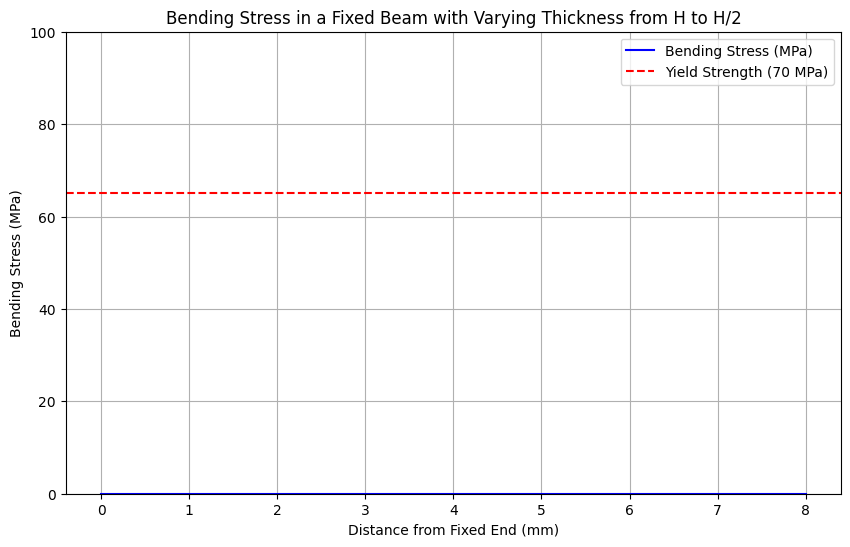

Maximum stress 0.00 MPa is within yield strength.


In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
F = 1  # Load in Newtons
L = 8  # Length of the beam in mm (2 meters)
H = 1.96   # Thickness at the root in mm (0.1 meters)
yield_strength_polycarbonate = 65e6  # Yield strength in Pascals (70 MPa)

# Function to calculate moment of inertia for a rectangular section
def moment_of_inertia(b, h):
    return (b * h**3) / 12

# Function to calculate bending stress
def bending_stress(F, L, H, x):
    # Varying thickness from H at root to H/2 at tip
    h = H * (1 - x / L) + (H / 2) * (x / L)
    b = 100  # Assume a constant width of 100 mm
    I = moment_of_inertia(b, h)
    M = F * (L - x)  # Moment at distance x from the fixed end
    c = h / 2  # Distance from neutral axis to outermost fiber
    sigma = M * c / I  # Bending stress
    return sigma

# Calculate bending stress along the length of the beam
x_values = np.linspace(0, L, 100)
stress_values = bending_stress(F, L, H, x_values)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(x_values, stress_values / 1e6, label='Bending Stress (MPa)', color='blue')
plt.axhline(y=yield_strength_polycarbonate / 1e6, color='red', linestyle='--', label='Yield Strength (70 MPa)')
plt.title('Bending Stress in a Fixed Beam with Varying Thickness from H to H/2')
plt.xlabel('Distance from Fixed End (mm)')
plt.ylabel('Bending Stress (MPa)')
plt.legend()
plt.grid()
plt.ylim(0, 100)  # Limit y-axis for better visualization
plt.show()

# Check if the maximum stress exceeds yield strength
max_stress = np.max(stress_values)
if max_stress > yield_strength_polycarbonate:
    print(f"Warning: Maximum stress {max_stress / 1e6:.2f} MPa exceeds yield strength.")
else:
    print(f"Maximum stress {max_stress / 1e6:.2f} MPa is within yield strength.")